<a href="https://colab.research.google.com/github/Hibath-K/HibathullaTheAnalyst.github.io/blob/main/dental21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [ ]:
import pandas as pd
from fbprophet import Prophet
import numpy as np


**Load data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dental21.csv to dental21.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['dental21.csv']))

In [ ]:
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,30-12-21,clinic_2,70172,1030,30,98.13
1,29-12-21,clinic_1,53371,756,15,65.13
2,29-12-21,clinic_2,69545,1030,30,105.18
3,27-12-21,clinic_1,43859,756,30,58.11
4,23-12-21,clinic_1,69303,756,30,119.00


**Apply Data Preprocessing**

In [ ]:
df.dtypes

appointment_date              object
clinic_name                   object
patient_id                     int64
practitioner_id                int64
appointment_duration_min       int64
revenues_from_appointment    float64
dtype: object

In [ ]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [ ]:
df.dtypes

appointment_date             datetime64[ns]
clinic_name                          object
patient_id                            int64
practitioner_id                       int64
appointment_duration_min              int64
revenues_from_appointment           float64
dtype: object

In [ ]:
df

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00
...,...,...,...,...,...,...
4066,2021-08-19,clinic_1,44907,755,30,83.87
4067,2021-02-09,clinic_1,45056,757,30,79.91
4068,2021-08-19,clinic_1,44919,757,30,90.10
4069,2021-07-22,clinic_1,45055,755,30,90.90


In [ ]:
df1 = df.copy()

In [ ]:
df1.drop('clinic_name',	axis = 1, inplace = True)
df1.drop('patient_id',	axis = 1, inplace = True)
df1.drop('practitioner_id',	axis = 1, inplace = True)
df1.drop('appointment_duration_min',	axis = 1, inplace = True)
df1 = df1.sort_values(by=['appointment_date'])
df1 = df1.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df1 = df1.drop_duplicates()

In [ ]:
df1

,appointment_date,revenues_from_appointment
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51
...,...,...
3428,2021-12-30,104.95
482,2021-12-30,1412.03
1020,2021-12-30,105.68
1100,2021-12-30,470.38


In [ ]:
df1.columns = ['ds', 'y']

In [ ]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51


**Create Time Series Model**

In [ ]:
m = Prophet(interval_width=0.95)

In [ ]:
training_run = m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=400, freq= 'D')

In [ ]:
future.head()

,ds
0,2021-01-07
1,2021-01-09
2,2021-01-10
3,2021-01-12
4,2021-02-07


**Forecast Data/ Evaluate Model**

In [ ]:
#forecast = m.predict(df1)

In [ ]:
date1 = '2022-01-01'
date2 = '2022-12-31'
forecast_dates = pd.date_range(date1, date2).tolist()
forecast_dates = pd.DataFrame(forecast_dates, columns = ['ds'])
forecast_dates.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [ ]:
forecast = m.predict(forecast_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,208.259325,-294.696137,725.379784,208.249349,208.268028,12.936066,12.936066,12.936066,12.936066,12.936066,12.936066,0.0,0.0,0.0,221.195390
1,2022-01-02,208.612124,-264.312146,702.606358,208.585193,208.633547,23.717377,23.717377,23.717377,23.717377,23.717377,23.717377,0.0,0.0,0.0,232.329501
2,2022-01-03,208.964924,-313.007001,667.310140,208.913368,209.007568,-14.609346,-14.609346,-14.609346,-14.609346,-14.609346,-14.609346,0.0,0.0,0.0,194.355578
3,2022-01-04,209.317724,-301.896366,685.933628,209.246573,209.385882,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,0.0,0.0,0.0,203.147871
4,2022-01-05,209.670523,-277.640072,674.408232,209.573422,209.764703,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,0.0,0.0,0.0,208.520518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,335.267220,-166.142191,814.462643,287.894445,378.413279,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,0.0,0.0,0.0,329.097366
361,2022-12-28,335.620019,-151.500329,821.996897,288.049842,379.064635,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,0.0,0.0,0.0,334.470014
362,2022-12-29,335.972819,-159.718687,806.897718,288.174230,379.715991,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,320.487364
363,2022-12-30,336.325619,-197.122920,826.056020,288.276510,380.367347,0.761218,0.761218,0.761218,0.761218,0.761218,0.761218,0.0,0.0,0.0,337.086836


In [ ]:
y_pred = forecast[['ds', 'yhat']]
y_pred.columns = ['date', 'revenues_from_appointment']
y_pred

,date,revenues_from_appointment
0,2022-01-01,221.195390
1,2022-01-02,232.329501
2,2022-01-03,194.355578
3,2022-01-04,203.147871
4,2022-01-05,208.520518
...,...,...
360,2022-12-27,329.097366
361,2022-12-28,334.470014
362,2022-12-29,320.487364
363,2022-12-30,337.086836


In [ ]:
y_pred.to_csv('dental22_forecasted.csv', index=False)

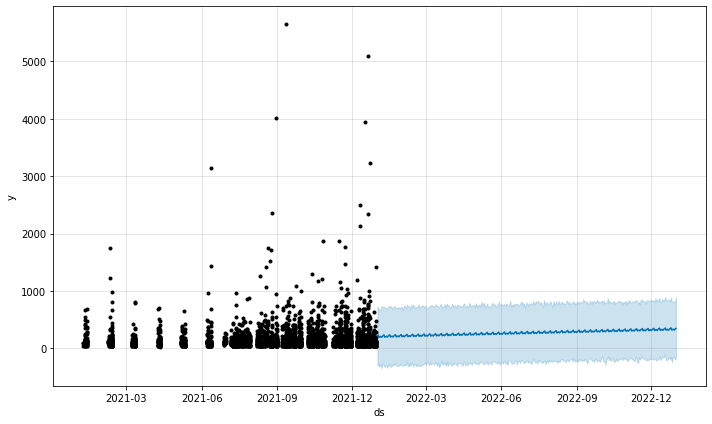

In [ ]:
plot = m.plot(forecast)

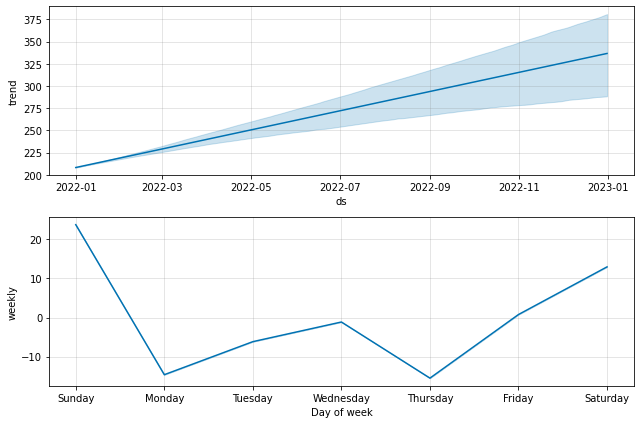

In [ ]:
plot2 = m.plot_components(forecast)